# AE102 - Data Analysis and Interpretation, Spring 2021 <br><br>
---
## Course Project - Analysis of Solar Eclipse Database <br><br>
---
### Soham S. Phanse <br>
### Indian Institute of Technology Bombay<br>

In [50]:
# Library Imports

## Basic imports

import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Interact functionality imported
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Scipy imports
import scipy.stats as ss
from scipy.stats import describe as d
from scipy.stats import gamma as g
from scipy.stats import t, expon, chi2, norm
from scipy.stats import dweibull as dw

In [51]:
# Import the csv file, pandas will read the file in the dataframe df
df = pd.read_csv('AE102 Course Project Data - Solar Eclipses - CSV.csv', sep=',')

# RV1 : Total Central Duration of the Eclipse in seconds

The Central Duration is only defined for _Hybrid_, _Total_, and _Annular_ eclipses

## Filtering and Cleaning Data in the Array

### Finding out the True Population Parameters

In [52]:
 # These variable stores the value of the Array of Central Duration in seconds
x = np.array(df[df[(df[df.columns[-1]] != 0)].columns[-1]])
y = np.array(df[df[(df[df.columns[-1]] != 0)].columns[-1]])

 ## Filtering out the non zero values

 ### Only Eclipses of type Hybrid, Total and Annular have central durations defined. 
 #### To filter out partial eclipses here is a non zero filter from numpy. 
x = x[x.nonzero()]
y = y[y.nonzero()]

 # This variable stores the mean of this array 
 ## Population Parameters of Central Duration of the Eclipse in seconds
population_mean = d(y).mean
population_var = d(y).variance
population_stddev = np.sqrt(population_var)

print("\n Considering only Hybrid Total and Annular Eclipses : \n\n Sample Mean = ", population_mean, "\n", "Sample Variance = ", population_var, "\n", "Sample Standard Deviation = ", population_stddev)


 Considering only Hybrid Total and Annular Eclipses : 

 Sample Mean =  242.83623693379792 
 Sample Variance =  23784.91364732828 
 Sample Standard Deviation =  154.22358330465636


## Fitting Distributions to the True Populations
Now, we try fitting various distributions like *gamma*, *exponential* and *normal* distributions 

3.19 -41.83 89.25


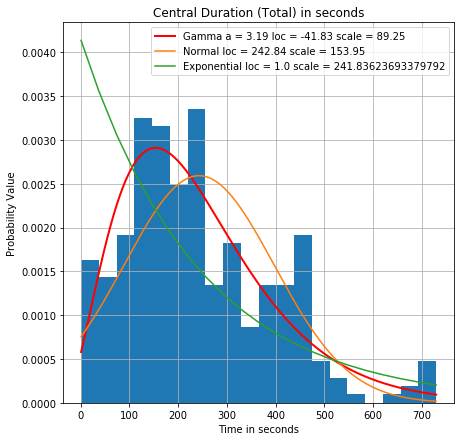

In [53]:
# Fitting a gamma distribution --

# Parameters required

## a, location and scale

### Parameter fitting for Gamma Distribution
a1, loc1, scale1 = g.fit(x)

print(a1.round(2), loc1.round(2), scale1.round(2))

### Parameter fitting for Normal Distribution
loc2, scale2 = norm.fit(x)

### Parameter fitting for Normal Distribution
loc3, scale3 = expon.fit(x)

## Plotting the fitted distribution

plt.figure(figsize=(7,7))
count, bins, ignored  = plt.hist(x, 20, density = True);

bins2 = np.linspace(min(x), max(x), 5000)

### Gamma plot
plt.plot(bins2, g(a1, loc1, scale1).pdf(bins2), linewidth=2, color = "red" , label='Gamma a = ' + str(a1.round(2)) + ' loc = ' + str(loc1.round(2)) + ' scale = ' + str(scale1.round(2)));

### Normal plot
plt.plot(bins2, norm(loc2, scale2).pdf(bins2), label='Normal loc = ' + str(loc2.round(2)) + ' scale = ' + str(scale2.round(2)))

### Exponential plot
plt.plot(bins, expon(loc3, scale3).pdf(bins), label='Exponential loc = ' + str(loc3) + ' scale = ' + str(scale3))

plt.title('Central Duration (Total) in seconds')
plt.legend(loc='best')
plt.grid(1)
plt.xlabel('Time in seconds');
plt.ylabel('Probability Value');

plt.savefig("RV1: Distribution Fitting.png")

We can clearly see that the Gamma distribution best approximates and fits the underlying data we have. 

## Sampling Distributions 

### Sample mean

Now, here what we do is collect some random samples, which is say, collect 250 samples from the Central Duration Data and find out there mean, and do 500 such trials. Now, we have such 500 entries which are nothing but the sample means, mean of a random sample from the database. 
___
Now, the expected value of the sample mean and variance is, 

$$ E[\bar{X}] = E[\frac{X_1 + \cdots + X_n}{n}] = \frac{1}{n}(E[X_1]+ \cdots + E[X_n]) = \mu$$


$$ Var[X] = Var[\frac{X_1 + \cdots + X_n}{n}] = \frac{1}{n^2}(Var[X_1] + \cdots + Var(X_n)) = \frac{nσ^2}{n^2} = \frac{σ^2}{n}$$

Now, from the Central Limit theorem, we can conclude that $\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$ is approximately normal.
___
From the below given analysis, we can indeed say that the sample mean with a large sample size, follows the normal distribution. 


In [54]:
def sample_mean(sample_size=250, number_of_trials=525):
    
    # Declaration about variables
    global store_mean
    
    # Number of times we pick data from an array
    sample_size = 250

    # Number of Samples, with each sample of size ```sample_size```
    number_of_trials = 525

    # Stores the means of each sample (525 items) in the form of an array
    store_mean = []

    # Iterative looping
    for i in range(number_of_trials):
        store_mean.append((np.random.choice(x, sample_size)).mean())
    
    # Forming the standard normal variable. 
    store_means_plot = (store_mean - population_mean)*(np.sqrt(number_of_trials))/population_stddev

    # X axis space for plotting the standard normal function/
    xspace = np.linspace(min(store_means_plot), max(store_means_plot), 1000)

    # Plotting - standardised

    mu, sigma = 0, 1
    plt.figure(figsize=(7,7))
    count, bins, ignored = plt.hist(store_means_plot, 100, density=True)
    plt.plot(bins, norm(loc = mu, scale=sigma).pdf(bins),linewidth=2, color='r', label="Standard Normal Variable")
    plt.title("Histogram of 'Sample Mean'- Standard Normal")
    plt.ylabel("Probability Value")
    plt.grid(1)
    plt.legend()
    plt.show()
    
    plt.savefig("RV1: Standard Normal Approximation for Sample Mean")

In [55]:
interact(sample_mean, sample_size=(200, 500, 20), number_of_trials=(500, 1000, 20));

interactive(children=(IntSlider(value=250, description='sample_size', max=500, min=200, step=20), IntSlider(va…

We know that the sample mean is approximately normal with mean $\mu$ and variance $\frac{\sigma^2}{n}$ where **n** is the sample size. We plot the graph here for better visualization. 

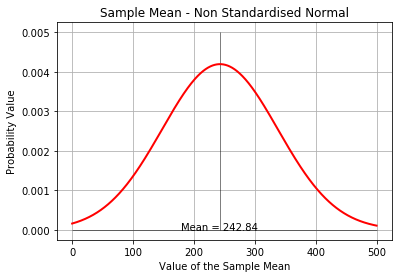

In [56]:
xspace2 = np.linspace(0, 500, 1000)
sample_size = 250
norm_sm = norm(population_mean, population_var/sample_size)
plt.plot(xspace2, norm_sm.pdf(xspace2), linewidth=2, color="red", label="Normal with mu = " + str(population_mean) + " and sigma = " + str(population_stddev))
plt.title("Sample Mean - Non Standardised Normal")
plt.grid(1)
plt.vlines(population_mean, ymin = 0, ymax = 0.005, linewidth=0.5)
#plt.vlines([population_mean + population_stddev, population_mean - population_stddev], ymin = 0, ymax = 0.002)
plt.hlines(0, xmin = xspace2[0], xmax = xspace2[-1], linewidth=0.5)
plt.text(population_mean, 0, "Mean = " + str(population_mean.round(2)), ha="center")
plt.xlabel("Value of the Sample Mean")
plt.ylabel("Probability Value");

plt.savefig("RV1: Normal Distribution of the Sample Mean")

### Sample Variance
---

In [57]:
def sample_vary():
    
    sample_size, number_of_trials = 250, 525
    
    # Stores the variances of each sample (1000 items) in the form of an array
    store_variance = []

    # Iterative looping
    for i in range(number_of_trials):
        store_variance.append(d(np.random.choice(x, sample_size)).variance)

    # Forming the chi squared variable
    store_vars_plot = (sample_size - 1)*store_variance/population_var
    
    return store_variance

Now, we know that only if the underlying population is normal then we can conclude that the sample variance follows the chi-squared distribution. If not then it cant be said. Hence :
- We try fitting the sample variance data with various known distributions
- We try to investigate whether the behaviour of the underlying population

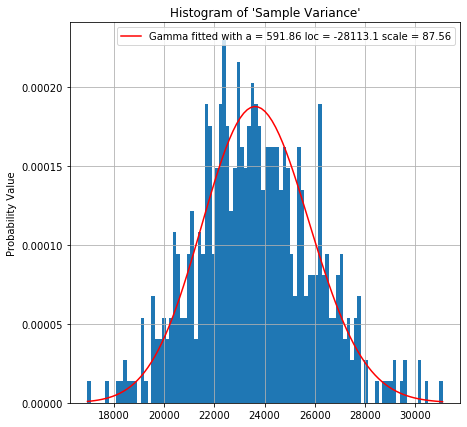

<Figure size 432x288 with 0 Axes>

In [58]:
# Fitting with known distributions
a4, loc4, scale4 = g.fit(sample_vary())

# Plotting
plt.figure(figsize=(7,7))
count2, bins2, ignored2 = plt.hist(sample_vary(), 100, density=True)
plt.plot(bins2, g(a4, loc4, scale4).pdf(bins2), 'r-', label="Gamma fitted with a = " + str(a4.round(2)) + " loc = " + str(loc4.round(2)) + " scale = " + str(scale4.round(2)))
plt.title("Histogram of 'Sample Variance'")
plt.ylabel("Probability Value")
plt.grid(1)
plt.legend()
plt.show()

plt.savefig("RV1: Distribution of the Sample Variance")

A few important poinst from the above analysis are as follows :
- We have ```store_variance``` array which stores the sample variances of random samples. ```number_of_trials``` are conducted and each time the sample variance is stored in the array. 
- Next, we try to fit a gamma distribution to this store_variance data. If it were a normal variable we could have approximated it as a $\chi^2$ random variable with $n-1$ degrees of freedom. 
- We will use this synthetically fitted gamma distribution to find confidence intervals for the mean and variance of the sample variance. 

## Confidence Intervals of Parameters
---
### Sample Mean
---
#### Confidence Intervals of Mean of Sample Means

Now, we have the ```store_mean``` array where we have stored the mean of 250 samples for 500 trials. We now assume that the sample means are distribited normally with unknown mean and variance.

We wish to construct a $100(1−\alpha)$ percent confidence interval for $\mu$. Since $\sigma$ is unknown, we can no longer base our interval on the fact that $\frac{\sqrt{n}(X - \mu)}{\sigma}$ is a standard normal random variable. However, by letting $S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(Xi− \bar{X})^2$ denote the sample variance, then it follows that, $\frac{\sqrt{n}(X − \mu)}{S}$ is a **t**-random variable with $n − 1$ degrees of freedom. Hence, from the symmetry of the
t-density function, we have that for any $\alpha \in$ (0, 1/2),

$$ P\{−t_{\frac{α}{2},n−1} < \frac{\sqrt{n}(X − \mu)}{S}< t_{\frac{α}{2},n−1} \} = 1 − \alpha$$
or, equivalently,
$$ P\{\bar{X} − t_{\frac{α}{2},n−1}\frac{S}{\sqrt{n}} < \mu < \bar{X} + t_{\frac{α}{2},n−1}\frac{S}{\sqrt{n}}\} = 1 − \alpha$$
Thus, if it is observed that $\bar{X} = \bar{x}$ and $S = s$, then we can say that “with 100(1 − $\alpha$) percent confidence” $\mu \in \{x − t_{\frac{α}{2},n−1}\frac{s}{\sqrt{n}}, x + t_{\frac{α}{2},n−1}\frac{s}{\sqrt{n}}$
	

In [59]:
# Finding the confidence interval for the Mean of Sample Means

## Some global variables to store some values
store_samp_var = None
def ci_mom(conf=95, sample_size=30):
    global store_samp_var
    ## Decide the confidence level in percentage
    # conf = 95

    ## Decide the sample size
    # sample_size = 30

    ### Converting into usable form
    conf2 = conf/100           #0.95
    conf3 = (1 - conf2)*0.5  #0.025
    conf4 = conf2 + conf3      #0.975
    alpha = 1-conf2

    ## Taking a random sample of size 'sample_size' from the sample means array 'store_mean'
    rand_samp = np.random.choice(store_mean, sample_size)

    ## Computing the sample mean (mean of means) and sample variance
    samp_mean = d(rand_samp).mean
    samp_var = d(rand_samp).variance
    store_samp_var = samp_var
    samp_std = np.sqrt(samp_var)

    ## The underlying distribution of the sample mean - variance unknown
    ci_mean = t(sample_size - 1)

    ### Underlying distribution of the sample mean - variance known
    ci_mean2 = norm(loc=0, scale=1)

    ## Computing the lower and upper limits for the interval - variance unknown
    a5 = ci_mean.ppf(alpha*0.5)*samp_std/np.sqrt(sample_size)
    lower = samp_mean - a5
    upper = samp_mean + a5

    ### Computing the lower and upper limits for the interval - variance known 
    a6, a7 = ci_mean2.ppf(conf3), ci_mean2.ppf(conf4)

    xspace3 = np.linspace(-5, 5, 100)
    plt.figure(figsize=(8, 8))
    plt.plot(xspace3, ci_mean.pdf(xspace3), linewidth=2, color="blue", label="T(" + str(sample_size - 1) + ") - Unknown \u03C3")
    plt.plot(xspace3, ci_mean2.pdf(xspace3), linewidth=2, color="red", label="N(0, 1) - Known \u03C3")
    plt.vlines([-a5, a5], ymin = 0, ymax = 0.4, label="Confidence Intervals - Unknown \u03C3", linewidth=1, color='orange')
    plt.vlines([a6, a7], ymin = 0, ymax = 0.4, label="Confidence Intervals - Known \u03C3", linewidth=1)
    plt.title("Confidence Interval of the Mean of Sample Means")
    plt.legend()
    plt.grid(1)
    plt.savefig("RV1: Confidence Interval of Mean of Sample Means")
        
    print("The confidence interval of the True mean when it is assumed that the variance is unknown (" + str(upper.round(2)) + ", " + str(lower.round(2))+ ")")

In [60]:
interact(ci_mom, conf=(0, 100, 5), sample_size=(10, 100, 5))

interactive(children=(IntSlider(value=95, description='conf', step=5), IntSlider(value=30, description='sample…

<function __main__.ci_mom(conf=95, sample_size=30)>

Observe that in accordance to the general trend observed in the confidence intervals, the interval is larger when the exact variance is not known and is approximated with the Sample Variance. 

#### Confidence Intervals of the Variance of Sample Means

---

We have an array of sample means. And we know with the help of Central Limit theorem with the help of which we can approximate and assume that the sample means follow a normal distribution. Now, we have a normal population. We assume that we done know its mean and variance. We found out a $95\%$ confidence interval for the Mean, and in this section, we try to find the confidence intervals for the sample variance. 

If $X_1, \cdots , X_n$ is a sample from a normal distribution having unknown parameters $\mu$ and $\sigma^2$, then we can construct a confidence interval for $\sigma^2$ by using the fact that $\frac{(n − 1)S^2}{\sigma^2} \approx \chi^2_{n−1}$
Hence,

$$P \{ \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2},n−1}} \leq (n − 1)\frac{S^2}{\sigma^2} \leq \frac{(n-1)S^2}{\chi^2_{1 - \frac{\alpha}{2},n−1}} \} = 1 - \alpha$$

In [61]:
# Finding the confidence interval for the Variance of Sample Means
def ci_vom(conf=95, sample_size=30):

    ## Decide the confidence level in percentage -- keeping it same as above

    ## Decide the sample size -- keeping it same as above

    ### Converting into usable form -- same as above
    conf2 = conf/100           #0.95
    conf3 = (1 - conf2)*0.5  #0.025
    conf4 = conf2 + conf3      #0.975
    alpha = 1-conf2
    
    ## Taking a random sample of size 'sample_size' from the sample means array 'store_mean' -- same as above
    
    ## Computing the sample mean (mean of means) and sample variance -- same as above
    
    ## The underlying distribution of the variance of sample means
    ci_var = chi2(sample_size - 1)

    ## Computing the lower and upper limits for the interval 
    a8, b = ci_var.ppf(1 - (alpha*0.5)), ci_var.ppf(alpha*0.5)
    lower_var = (sample_size - 1)*store_samp_var/b
    upper_var = (sample_size - 1)*store_samp_var/a8

    xspace4 = np.linspace(-50, 100, 100)
    plt.figure(figsize=(6, 6))
    plt.plot(xspace4, ci_var.pdf(xspace4), linewidth=2, color="blue", label="$\u03C7^2_{%2.f}$"%(sample_size-1))
    plt.vlines([a8, b], ymin = 0, ymax = 0.04, label="Confidence Intervals", linewidth=1, color='orange')
    plt.title("Confidence Interval of the Variance of Sample Means")
    plt.legend()
    plt.grid(1)
    plt.savefig("RV1:Confidence Interval of the Variance of Sample Mean")
    
    print("The confidence interval of the Variance of Sample Means: (" + str(upper_var.round(2)) + ", " + str(lower_var.round(2))+ ")")

In [62]:
interact(ci_vom, conf=(0,100,5), sample_size=(10, 100, 5))

interactive(children=(IntSlider(value=95, description='conf', step=5), IntSlider(value=30, description='sample…

<function __main__.ci_vom(conf=95, sample_size=30)>

### Sample Variance

Since we have synthetically fitted a gamma distribution to the sample variances we can make it the underlying distribution to find approximate confidence intervals. We proceed as follows.

#### Confidence Intervals for the Variance

In [63]:
def ci_vari(conf = 95, sample_size = 30):
    # Finding the confidence interval for the Variance

    ## Decide the confidence level in percentage -- same as above (95%)

    ## Decide the sample size - same as above (30)

    ### Converting into usable form - same as above
    conf2 = conf/100           #0.95
    conf3 = (1 - conf2)*0.5  #0.025
    conf4 = conf2 + conf3      #0.975
    alpha = 1-conf2

    ## Taking a random sample of size 'sample_size' from the sample variances array 'store_variance'
    rand_samp_var = np.random.choice(sample_vary(), sample_size)

    ## Computing the sample mean (mean of variances) and sample variance (variance of variances)
    samp_mean2 = d(rand_samp_var).mean
    samp_var2 = d(rand_samp_var).variance
    samp_std2 = np.sqrt(samp_var2)

    ## The underlying distribution of the sample variance
    ### Synthetically fitted, code in the sections above

    ci_var_2 = g(a4, loc4, scale4)
    print(a4.round(2), loc4.round(2), scale4.round(2))

    ## Computing the lower and upper limits for the interval
    lower2, upper2 = ci_var_2.ppf(1 - (alpha*0.5)), ci_var_2.ppf(alpha*0.5)

    xspace5 = np.linspace(5000, 40000, 100)
    plt.figure(figsize=(7, 6))
    plt.plot(xspace5, ci_var_2.pdf(xspace5), linewidth=2, color="red", label="Gamma a = " + str(a4.round(2)) + " \nloc = " + str(loc4.round(2)) + " scale = " + str(scale4.round(2)))
    plt.vlines([lower2, upper2], ymin = 0, ymax = 0.0001, label="Confidence Intervals", linewidth=1)
    plt.title("Confidence Interval for the Variance")
    plt.legend(loc='upper left')
    plt.grid(1)
    plt.savefig("RV1: Confidence Interval for the Variance of the Original Distribution")
    
    print("The 95% confidence interval for the Variance: (" + str(upper2.round(2)) + ", " + str(lower2.round(2))+ ")")
    print("And the Standard Deviation: (" + str(np.sqrt(upper2).round(2)) + ", " + str(np.sqrt(lower2).round(2))+ ")")

In [64]:
interact(ci_vari, conf=(0, 100, 5), sample_size=(10, 100, 5))

interactive(children=(IntSlider(value=95, description='conf', step=5), IntSlider(value=30, description='sample…

<function __main__.ci_vari(conf=95, sample_size=30)>

### Conclusions

Here are the conclusions we draw from the data we have observed. 
- RV1 follows a $\Gamma$ distribution with the following parameters:
    - a = 3.19 
    - location = -41.83
    - scale = 89.25
- The sample mean follows the normal distribution as anticipated. 
    - Here, we took 30 samples from the Sample Means. 
    - The 95% confidence interval for the Mean of Sample Mean is (238.56, 244.09)
    - The 95% confidence interval for the Variance of Sample Means is (34.82, 99.2)
- The Sample Variance follows the $\Gamma$ distribution which has been synthetically fitted.
    - The parameters are as follows: 112.52 -425.04 214.34
        - a = 112.52
        - location = -425.04
        - scale = 214.34
    - The 95% confidence for the Variance is (19442.09, 28347.49)
    - The 95% confidence for the Standard Deviation is (139.43, 168.37)

# RV2 : Latitude of Eclipses with Non zero Central Duration
## Filtering and Cleaning up the Data

In [65]:
# Filter out the latitudes where the central duration of the eclipse is zero or not defined
lat1 = df[df.Central_Duration_Total_in_seconds!=0].Latitude
lat2 = []

# Data cleaning and segregation into the Northern and Southern Hemispheres

## The entries having the last entry 'N' will be stripped off of that letter and kept as it is. 
## The entries having the last entry 'S' will be stripped off of that letter and will be multiplied by -1

### The logic is to have positive values of latitude denoting places in the Northern Hemisphere and negative values of latitude denoting places in the Southern Hemisphere

### The EQUATOR is denoted by '0'

#### This loop does exactly this
for each in lat1:
    if str(each)[-1]=='N':
        buffer = int(str(each)[0:-1])
    else:
        buffer = -1*int(str(each)[0:-1])
    lat2.append(buffer)

# Conversion into Numpy array
lat3 = np.array(lat2)

# Calculating Population Parameters
population_mean_3 = d(lat3).mean
population_var_3 = d(lat3).variance
population_stddev_3 = np.sqrt(population_var_3)

print(population_mean_3)

-0.926829268292683


## Fitting Distributions to Data

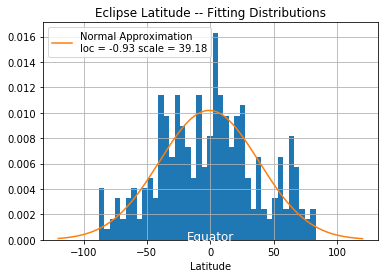

In [66]:
# We try to fit a distribution to the given data. 

## Fitting Normal Distribution
a1, b1 = norm.fit(lat3)

## Plotting

bin = np.linspace(-120, 120, 1000)
plt.hist(lat3, 40, density=True);
plt.plot(bin, norm(a1, b1).pdf(bin), label="Normal Approximation \nloc = "+str(a1.round(2)) + " scale = " + str(b1.round(2)))
plt.xlabel("Latitude")
plt.title("Eclipse Latitude -- Fitting Distributions")
plt.text(0, 0, "Equator", ha = "center", color="white", fontsize=12);
plt.grid(1)
plt.legend();
plt.savefig("RV2: Distribution Fitting")

From the above data fitting we can approximately assume that the Eclipse Latitude follow a Normal distribution with Mean = -0.93 and scale = 39.18.

---

Now, we go ahead with the Sampling distributions. 

## Sampling Distributions
---
### Sample Mean

We find the sample mean below.

In [67]:
def sample_mean_lat(sample_size=250, number_of_trials=525):
    
    global lat3

    # Number of times we pick data from an array
    #sample_size = 250

    # Number of Samples, with each sample of size ```sample_size```
    #number_of_trials = 525

    # Stores the means of each sample (1000 items) in the form of an array
    store_mean_lat = []

    # Iterative looping
    for i in range(number_of_trials):
        store_mean_lat.append(np.random.choice(lat3, sample_size).mean())
    
    # Forming the standard normal variable. 
    store_means_lat_plot = (store_mean_lat - population_mean_3)*(np.sqrt(number_of_trials))/population_stddev_3

    # X axis space for plotting the standard normal function/
    xspace = np.linspace(min(store_means_lat_plot), max(store_means_lat_plot), 1000)

    # Plotting - standardised

    mu, sigma = 0, 1
    plt.figure(figsize=(5,5))
    count, bins, ignored = plt.hist(store_means_lat_plot, 100, density=True)
    plt.plot(bins, norm(loc = mu, scale=sigma).pdf(bins),linewidth=2, color='r', label="Standard Normal Variable")
    plt.title("Histogram of 'Sample Mean'- Standard Normal")
    plt.ylabel("Probability Value")
    plt.grid(1)
    plt.legend()
    plt.show()
    plt.savefig("RV2: Distribution of the Sample Mean - Standard Normal")

In [68]:
interact(sample_mean_lat, sample_size=(200, 500, 20), number_of_trials=(500, 1000, 20));

interactive(children=(IntSlider(value=250, description='sample_size', max=500, min=200, step=20), IntSlider(va…

### Sample Variance

In [69]:
def sample_variance_lat(sample_size, number_of_trials):
        
    # Number of times we pick data from an array
    #sample_size = 250

    # Number of Samples, with each sample of size ```sample_size```
    #number_of_trials = 525

    # Stores the means of each sample (1000 items) in the form of an array
    store_var_lat = []

    # Iterative looping
    for i in range(number_of_trials):
        store_var_lat.append(d(np.random.choice(lat3, sample_size)).variance)
    
    # Forming the chi-squared random variable. 
    #store_var_lat_plot = (store_var_lat - population_mean_3)*(np.sqrt(number_of_trials))/population_stddev_3
    store_var_lat_plot = ((sample_size - 1)*store_var_lat)/population_var_3
    
    # X axis space for plotting the standard normal function/
    xspace = np.linspace(0, max(store_var_lat_plot), number_of_trials)

    # Plotting - standardised

    a, b, c = g.fit(store_var_lat_plot)
    
    plt.figure(figsize=(5,5))
    count, bins, ignored = plt.hist(store_var_lat_plot, 100, density=True)
    plt.plot(bins, g(a,b,c).pdf(bins), label="Gamma Approximation \na = " + str(a.round(2)) + " loc = " + str(b.round(2)) + " scale = " + str(c.round(2)))
    plt.title("Histogram of 'Sample Variance'")
    plt.ylabel("Probability Value")
    plt.grid(1)
    plt.legend()
    plt.show()
    plt.savefig("RV2: Distribution of the Sample Variance")

In [70]:
interact(sample_variance_lat, sample_size=(10, 20, 2), number_of_trials=(500, 1000, 20))

interactive(children=(IntSlider(value=14, description='sample_size', max=20, min=10, step=2), IntSlider(value=…

<function __main__.sample_variance_lat(sample_size, number_of_trials)>

## Confidence Intervals of Parameters
---
### True Mean
---
Since our random variable Eclipse Magnitude as well as the sample mean is normally distributed we have the following estimate for the mean $\mu$: (assuming that both the mean as well the variance is not known)

$ \frac{\sqrt{n}(X − \mu)}{S}$ has a $t$ distribution with (n-1) degrees of freedom. Therefore,

$$ P\{-t_{\frac{\alpha}{2}, n-1} < \frac{\sqrt{n}(X − µ)}{\sigma}< t_{\frac{\alpha}{2}, n-1}\} = 1 - \alpha$$

After working it out, we get that, 

$$ P\{\bar{X} − t_{\frac{\alpha}{2}, n-1}\frac{S}{\sqrt{n}} < \mu < \bar{X} + t_{\frac{\alpha}{2}, n-1}\frac{S}{\sqrt{n}}\} = 1 - \alpha$$

Here, $\alpha = 1 - \frac{confidence \hspace{2pt} interval \hspace{2pt} in \hspace{2pt} percentage}{100}$. 

In [71]:
# Function name: Confidence Interval of Mean of Eclipse Magnitude. 
def ci_mag_mean(sample_size, conf):
    
    ## Decide the confidence level in percentage
    # conf = 95

    ## Decide the sample size
    # sample_size = 30

    ### Converting into usable form
    conf2 = conf/100           # 0.95
    conf3 = (1 - conf2)*0.5    # 0.025
    conf4 = conf2 + conf3      # 0.975
    alpha = 1-conf2            # 0.05

    ## Taking a random sample of size 'sample_size' from the population 'lat3'
    rand_samp = np.random.choice(lat3, sample_size)

    ## Computing the sample mean (mean of means) and sample variance
    samp_mean = d(rand_samp).mean
    samp_var = d(rand_samp).variance
    store_samp_var = samp_var
    samp_std = np.sqrt(samp_var)

    ## The underlying distribution of the sample mean - variance unknown
    ci_mean = t(sample_size - 1)

    ### Underlying distribution of the sample mean - variance known
    ci_mean2 = norm(loc=0, scale=1)

    ## Computing the lower and upper limits for the interval - variance unknown
    a5 = ci_mean.ppf(alpha*0.5)*samp_std/np.sqrt(sample_size)
    lower = samp_mean - a5
    upper = samp_mean + a5

    ### Computing the lower and upper limits for the interval - variance known 
    a6, a7 = ci_mean2.ppf(conf3), ci_mean2.ppf(conf4)

    xspace3 = np.linspace(-5, 5, 100)
    plt.figure(figsize=(8, 8))
    plt.plot(xspace3, ci_mean.pdf(xspace3), linewidth=2, color="blue", label="T(" + str(sample_size - 1) + ") - Unknown \u03C3")
    plt.plot(xspace3, ci_mean2.pdf(xspace3), linewidth=2, color="red", label="N(0, 1) - Known \u03C3")
    plt.vlines([-a5, a5], ymin = 0, ymax = 0.4, label="Confidence Intervals - Unknown \u03C3", linewidth=1, color='orange')
    plt.vlines([a6, a7], ymin = 0, ymax = 0.4, label="Confidence Intervals - Known \u03C3", linewidth=1)
    plt.title("Confidence Interval of the Mean - Latitude")
    plt.legend()
    plt.grid(1)
    plt.savefig("RV2: Confidence Interval of the True Mean of Eclipse Latitude")
        
    print("The confidence interval of the True mean when it is assumed that the variance is unknown (" + str(upper.round(2)) + ", " + str(lower.round(2))+ ")")

In [72]:
interact(ci_mag_mean, conf=(1, 100, 2), sample_size=(10, 200, 5));

interactive(children=(IntSlider(value=105, description='sample_size', max=200, min=10, step=5), IntSlider(valu…

It can be clearly seen that the true mean lies towards ```0``` which is the equator. That is any random sample of solar eclipses the expected value of the eclipse latitude is near ```0```, which is near the equator. 

### True Variance
---
Since our random variable Eclipse Magnitude is normally distributed we have the following estimate for the variance $\mu$: (assuming that both the mean as well the variance is not known)

We know that $\frac{(n − 1)S^2}{\sigma^2} ∼ \chi^2_{n-1}$ approximately. Hence,

$$ P\{\chi^2_{1−\frac{\alpha}{2},n−1} \leq \frac{(n − 1)S^2}{\sigma^2} \leq \chi^2_{\frac{\alpha}{2},n−1} = 1 − \alpha$$

or, equivalently,

$$ P\{\frac{(n − 1)S^2}{\chi^2_{\frac{\alpha}{2},n−1}} \leq \sigma^2 \leq \frac{(n − 1)S^2}{\chi^2_{1−\frac{\alpha}{2},n−1}} \} = 1 − \alpha$$

In [73]:
# Function name: Confidence Interval of Variance of Eclipse Magnitude. 
def ci_mag_var(sample_size, conf):
    
    ## Decide the confidence level in percentage
    # conf = 95

    ## Decide the sample size
    # sample_size = 30

    ### Converting into usable form
    conf2 = conf/100           # 0.95
    conf3 = (1 - conf2)*0.5    # 0.025
    conf4 = conf2 + conf3      # 0.975
    alpha = 1-conf2            # 0.05

    ## Taking a random sample of size 'sample_size' from the population 'lat3'
    rand_samp = np.random.choice(lat3, sample_size)

    ## Computing the sample mean (mean of means) and sample variance
    samp_mean = d(rand_samp).mean
    samp_var = d(rand_samp).variance
    store_samp_var = samp_var
    samp_std = np.sqrt(samp_var)

    ## The underlying distribution of the sample variance - both mean and variance unknown
    ci_var = chi2(sample_size - 1)

    ## Computing the lower and upper limits for the interval - variance unknown
    a5 = ci_var.ppf(alpha*0.5)
    a6 = ci_var.ppf(1 - alpha*0.5)
    lower = (sample_size-1)*samp_var/a5
    upper = (sample_size-1)*samp_var/a6

    xspace3 = np.linspace(-50, 50, 1000)
    plt.figure(figsize=(8, 8))
    plt.plot(xspace3, ci_var.pdf(xspace3), linewidth=2, color="blue", label="Chi(" + str(sample_size - 1) + ") - Unknown mean and \u03C3")
    plt.vlines([a5, a6], ymin = 0, ymax = 0.09, label="Confidence Intervals - Unknown mean and \u03C3", linewidth=1, color='orange')
    plt.title("Confidence Interval of the Variance - Latitude")
    plt.legend()
    plt.grid(1)
    plt.savefig("RV2: Confidence Interval of the True Variance of Eclipse Latitude")
        
    print("The confidence interval of the True variance with " + str(conf) + "% confidence and sample size = " + str(sample_size) + " when it is assumed that both mean and variance is unknown (" + str(upper.round(2)) + ", " + str(lower.round(2))+ ")")
    print("The confidence interval of the True standard deviation with " + str(conf) + "% confidence and sample size = " + str(sample_size) + " when it is assumed that both mean and variance is unknown (" + str(np.sqrt(upper).round(2)) + ", " + str(np.sqrt(lower).round(2))+ ")")

In [74]:
interact(ci_mag_var, conf=(1, 100, 2), sample_size=(10, 30, 5));

interactive(children=(IntSlider(value=20, description='sample_size', max=30, min=10, step=5), IntSlider(value=…

# Hypothesis Testing
---
Now, we go ahead with formulating a hypothesis and testing it. Lets use RV2 - Eclipse Latitude. It approximately follows the normal distribution. Now, lets formulate the null and the alternate hypothesis. 

## Null Hypothesis

We formulate the hypothesis about the mean of this population, it is as follows:

$$ H_0: \mu(Eclipse \hspace{2pt}Latitude) = \mu_0 \hspace{5pt} such \hspace{2pt} that \hspace{5pt} \mu_0 = 0$$

This hypothesis says that the mean latitude of the eclipses is zero $\longrightarrow$ that is the eclipse latitudes are expected to be near to the equator. 

## Alternate Hypothesis

The alternate hypothesis is as follows :

$$ H_0: \mu(Eclipse \hspace{2pt}Latitude) \neq \mu_0 \hspace{5pt} such \hspace{2pt} that \hspace{5pt} \mu_0 = 0$$

### Solution 

We are constructing this test assuming that the true variance (the calculated population variance) is known. Later, we also present the tests in the cases where the variance in unknown. Lets first decide the significance level $\alpha = 0.05$. Then we go ahead and decide the critical region. 

$$ C = \{X_1, \ldots , X_n : |X − µ_0| > c\}$$ which when calculated further

$$ P_{µ_0}\{|X − µ_0| > c\} = \alpha$$

- Here is the logic behind the test
> Here, we assume that we have already accepted $H_0$. Hence the mean is $\mu_0$ And now we are testing that if we take a sample of size $n$ then what is the probability that the sample mean will be far away from the $\mu_0$ by a distance greater than $c$. If this probability is greater than alpha which is the significance value we have already set apriori, then the Hypothesis we initially assumed is not true. This is similar to proof by contradiction. Hence we reject the hypothesis. 
- What is **$\alpha$**?
> Now, what have we done, is we ahve accepted the null hypothesis that the true mean is indeed $\mu_0$, and then we are calculating the probability that the sample mean will be $c$ distance away from the $\mu_0$, here $c$ is decided with the help of significance level. So, if $\bar{X}$ from $u_0$ is at a distance greater than $c$, then the null hypothesis is wrong. Now, you see, $\alpha$ is the probability value, which is the probability that assuming the null hypothesis to be true i.e. true mean is $u_0$, what is the probability that the sample mean will be $c$ distance far from $\mu_0$. So $\alpha$ is the probability that null hypothesis is rejected even though it is true. 

Now, we proceed from the preceding Probability expression, when $\mu = \mu_0$, $X$ will be normally distributed with mean $\mu_0$ and variance $\frac{\sigma^2}{n}$ and so $Z$, defined by
$Z = \frac{\sqrt{n}(X - \mu_0)}{\sigma}$ will have a standard normal distribution. 

$$ P\{ |Z| > \frac{c\sqrt{n}}{\sigma} = \alpha$$ 
or, equivalently,

$$ 2P\{ Z > \frac{c\sqrt{n}}{\sigma}\} = \alpha$$
where $Z$ is a standard normal random variable. However, we know that $P\{Z > z_{\frac{\alpha}{2}}\} = \frac{\alpha}{2}$ and so $\frac{c\sqrt{n}}{\sigma} = z_{\frac{\alpha}{2}}$ or $ c = \frac{z_{\frac{\alpha}{2}}\sigma}{\sqrt{n}}$. Thus, the significance level α test is **reject H0 if**

$$\frac{\sqrt{n}}{\sigma}|\bar{X} − \mu_0| > z_{\frac{\alpha}{2}}$$ 
 and **accept H0 if**

$$\frac{\sqrt{n}}{\sigma}|\bar{X}− \mu_0| \leq z_{\frac{\alpha}{2}}$$ 

We implement it below. 

In [75]:
# Function 'hypothesis' tests whether the null hypothesis is correct or not using the above tests

## It gives the user the freedom to custom define the 

### significance level
### sample size
### mu_0 values for the NULL hypothesis

## Variance is assumed to be known

def hypothesis(significance_level, sample_size):
    
    # Assume `population_var_3` to be of global scope
    global population_var_3
    
    # First we generate the random sample of 'sample size = sample_size' from the 'lat3' array 
    rand_sample = np.random.choice(lat3, sample_size)
    
    # Calculate the sample mean
    sample_mean = d(rand_sample).mean
    
    # The true variance is approximated by the population_var_3 variable
    
    # \mu_0 is zero as stated in the NULL hypothesis
    mu_0 = 0
    
    # finding out the z_{alpha*0.5}
    zalpha = norm(0,1).ppf(significance_level*0.5)
    
    # Test --
    test_stat = ((np.sqrt(sample_size)*(sample_mean - mu_0))/np.sqrt(population_var_3))
    
    # Find the p-value
    pval = 2*(1 - norm(0,1).cdf(abs(test_stat)))
    
    ## Rejection
    
    if test_stat<(-1*zalpha) and test_stat>zalpha:
        print("The null hypothesis is rejected at Significance Level = " + str(significance_level) + " Sample Size = " + str(sample_size)+"\n\n")
        print("* Monitoring Data -- (for the developer) Test Statistic = " + str(test_stat.round(3)) + " Zalpha = " + str(zalpha.round(3))+"\n\n")
    
    ## Acceptance
    
    else:
        print("The null hypothesis is accepted at Significance Level = " + str(significance_level) + " Sample Size = " + str(sample_size) + "\n\n")
        print("* Monitoring Data -- (for the developer) Test Statistic = " + str(test_stat.round(3)) + " Zalpha = " + str(zalpha.round(3)) + "\n\n")
    
    if pval>significance_level:
        print("The P-value of the test is : ", pval)
        print("Since the p-value is greater than the significance level the Hypothesis is **accepted**")
    else:
        print("The P-value of the test is : ", pval)
        print("Since the p-value is smaller than the significance level the Hypothesis is **rejected**")

In [76]:
interact(hypothesis, significance_level = (0.001, 0.999, 0.005), sample_size = (1, 500, 1));

interactive(children=(FloatSlider(value=0.496, description='significance_level', max=0.999, min=0.001, step=0.…

---
Now we test the same hypothesis considering that the variance is not known apriori. In such cases we use what is known as the $t$ test which is as follows. 

$$ accept \hspace{2pt} H_0 \hspace{2pt} if \hspace{5pt}|\frac{\sqrt{n}(X − µ_0)}{S}| \leq t_{\alpha/2, n-1}$$

$$ reject \hspace{2pt} H_0 \hspace{2pt} if \hspace{5pt}|\frac{\sqrt{n}(X − µ_0)}{S}| > t_{\alpha/2, n-1} $$

---

In [77]:
# Function 'hypothesis' tests whether the null hypothesis is correct or not using the above tests

## It gives the user the freedom to custom define the 

### significance level
### sample size
### mu_0 values for the NULL hypothesis

## Variance is assumed to be not known

def hypothesis2(significance_level, sample_size):
    
    # Assume `population_var_3` to be of global scope
    global population_var_3
    
    # First we generate the random sample of 'sample size = sample_size' from the 'lat3' array 
    rand_sample = np.random.choice(lat3, sample_size)
    
    # Calculate the sample mean
    sample_mean = d(rand_sample).mean
    
    # The true variance is approximated by the population_var_3 variable
    
    # \mu_0 is zero as stated in the NULL hypothesis
    mu_0 = 0
    
    # finding out the t_{alpha*0.5}
    zalpha = t(sample_size - 1).ppf(significance_level*0.5)
    
    # Test --
    test_stat = ((np.sqrt(sample_size)*(sample_mean - mu_0))/np.sqrt(population_var_3))
    
    # Find the p-value
    pval = 2*(1 - t(sample_size-1).cdf(abs(test_stat)))
    
    ## Rejection - General
    
    if test_stat<(-1*zalpha) and test_stat>zalpha:
        print("The null hypothesis is rejected at Significance Level = " + str(significance_level) + " Sample Size = " + str(sample_size)+"\n\n")
        print("* Monitoring Data -- (for the developer) Test Statistic = " + str(test_stat.round(3)) + " Talpha = " + str(zalpha.round(3))+"\n\n")
    
    ## Acceptance - General
    
    else:
        print("The null hypothesis is accepted at Significance Level = " + str(significance_level) + " Sample Size = " + str(sample_size) + "\n\n")
        print("* Monitoring Data -- (for the developer) Test Statistic = " + str(test_stat.round(3)) + " Talpha = " + str(zalpha.round(3)) + "\n\n")
    
    ## P value test based Rejection acceptance
    
    if pval>significance_level:
        print("The P-value of the test is : ", pval)
        print("Since the p-value is greater than the significance level the Hypothesis is **accepted**")
    
    else:
        print("The P-value of the test is : ", pval)
        print("Since the p-value is smaller than the significance level the Hypothesis is **rejected**")

In [78]:
interact(hypothesis2, significance_level = (0.001, 0.999, 0.005), sample_size = (1, 500, 1));

interactive(children=(FloatSlider(value=0.496, description='significance_level', max=0.999, min=0.001, step=0.…

# Regression Analysis
---

In [79]:
# A collection of some properties on whom we try and apply regression analysis. 

cent = np.array(df[df.Central_Duration_Total_in_seconds!=0].Central_Duration_Total_in_seconds)
path = np.array(df[df.Central_Duration_Total_in_seconds!=0].Path_Width_km)
lat4 = lat3
mag = np.array(df[df.Central_Duration_Total_in_seconds!=0].Eclispe_Magnitude)
gamma = np.array(df[df.Central_Duration_Total_in_seconds!=0].Gamma)
td = np.array(df[df.Central_Duration_Total_in_seconds!=0].TD_of_Greatest_Eclipse)
alt = np.array(df[df.Central_Duration_Total_in_seconds!=0].Sun_Alt)

# Some minor preprocessing for array 'path'
for i in range(len(path)):
    if path[i]=='-':
        path[i] = 212.28070175438597
    else:
        path[i] = float(path[i])
        
club_all = np.array([cent, [int(x) for x in path], lat4, mag, gamma, td, alt])
names = ["Total Central Duration in seconds", "Path Width in Km", "Eclipse Latitude", "Eclipse Magnitude", "Gamma", "TD of Greatest Eclipse", "Sun Altitude"]

<ipython-input-80-b0ce1c8579e0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-80-b0ce1c8579e0>:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Best pair :  [3, 6]
The Co-efficient of Determination is :  0.8769118963349166


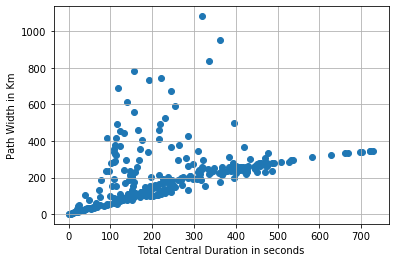

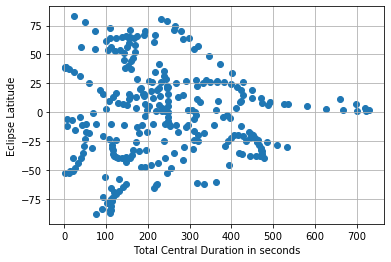

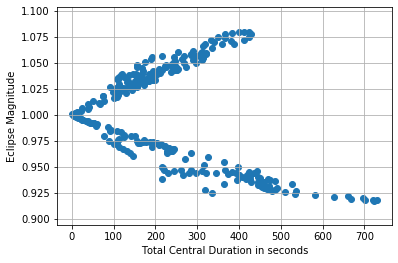

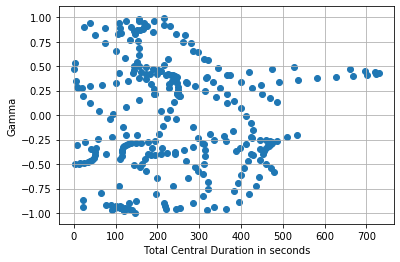

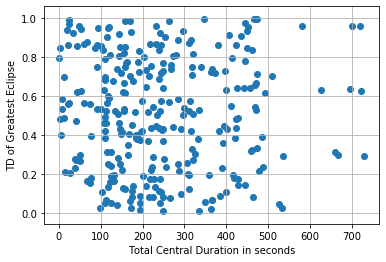

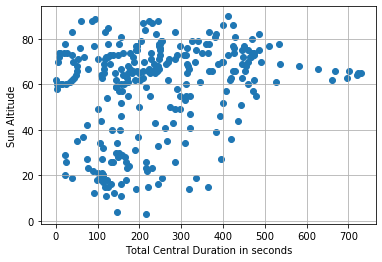

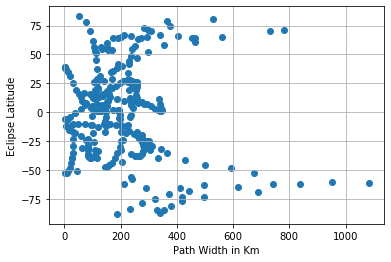

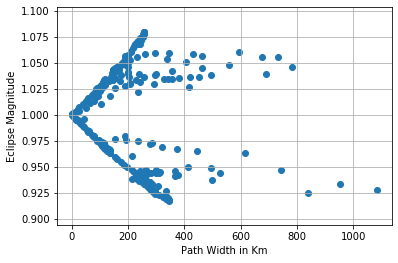

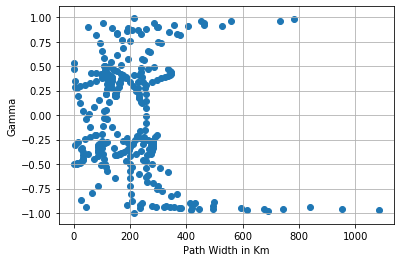

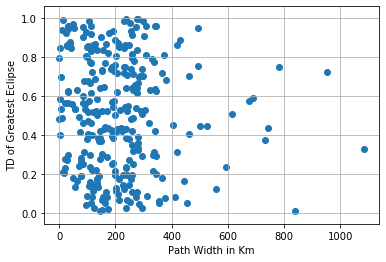

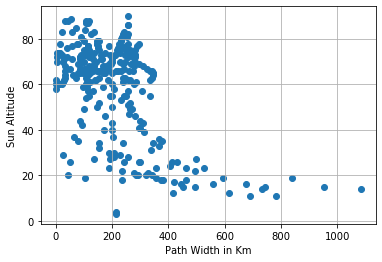

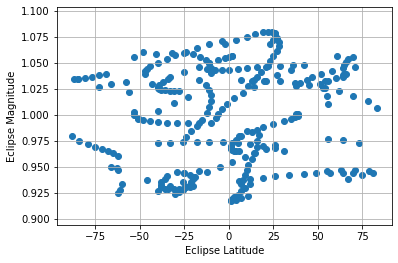

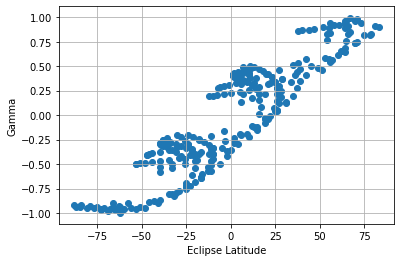

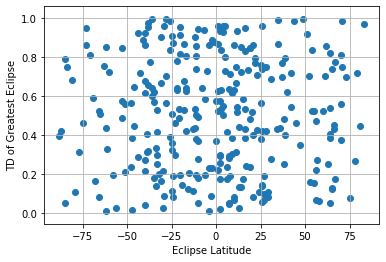

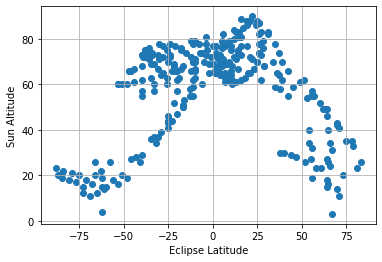

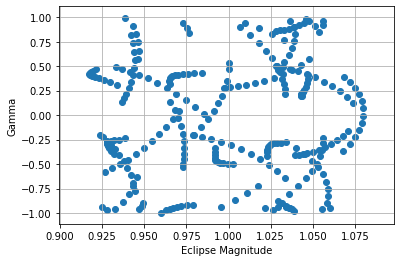

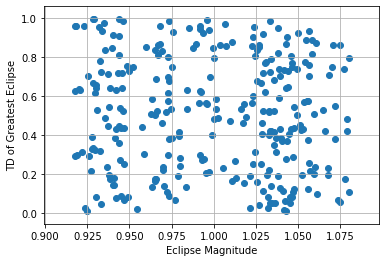

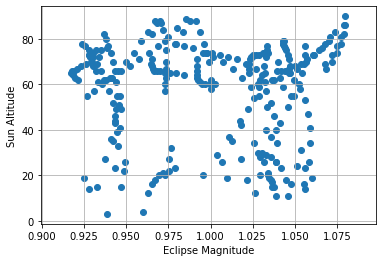

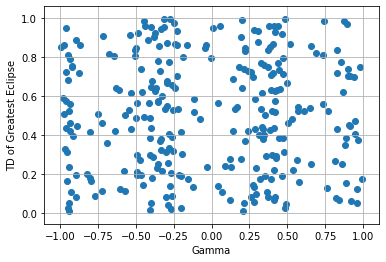

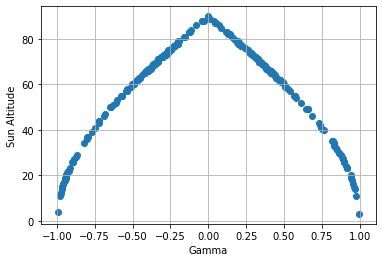

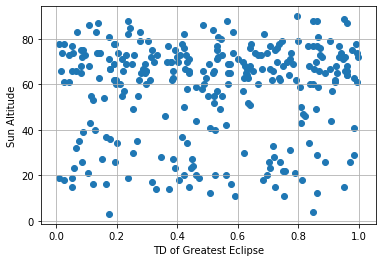

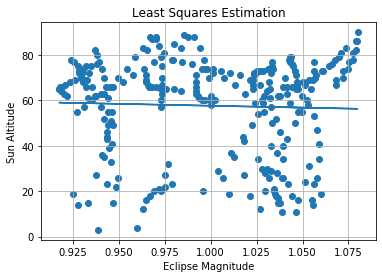

In [80]:
# Some variables to store intermediate values used in the function
Rsquare, flag = [], []
AA, BB = None, None

# Function finds out the best possible pair of arrays for regression analysis based on Rsquare test

def learn(array):
    
    ## Declaring some global variables
    global Rsquare
    global flag
    global AA
    global BB
    
    ## The loop which performs the Rsquared test for all possible pairs
    
    for i in range(len(array)):
        for j in range(i+1, len(array)):
            x, y = array[i], array[j]
            sxx, syy = np.sum(np.multiply(x, x)), np.sum(np.multiply(y, y))
            sxy = np.sum(np.multiply(x, y))
            #n = len(x)
            #B = (sxy - mx*sy)/(sxx - n*(mx**2))
            #A = my - B*mx
            ssr = (sxx*syy - sxy**2)/sxx
            rbuffer = 1 - (ssr/syy)
            Rsquare.append(rbuffer)
            flag.append([i, j])
            plt.figure()
            plt.scatter(x, y)
            plt.xlabel(names[i])
            plt.ylabel(names[j])
            plt.grid(1)
            plt.savefig("RG_An: Co-relation of " + names[i] + " and " + names[j])
    
    best = max(Rsquare)
    inx = Rsquare.index(best)
    print("Best pair : " , flag[inx])
    
    ## After identifying the best pair, regression analysis is performed
    X, Y = club_all[flag[inx][0]], club_all[flag[inx][1]]
    mX, mY = d(X).mean, d(Y).mean
    sX, sY = np.sum(X), np.sum(Y)
    sXX, syy = np.sum(np.multiply(X, X)), np.sum(np.multiply(Y, Y))
    sXY = np.sum(np.multiply(X, Y))
    n = len(X)
    B = (sXY - mX*sY)/(sXX - n*(mX**2))
    A = mY - B*mX
    AA, BB = A, B
    plt.figure()
    plt.plot(X, A + B*X, label="Regression Estimation")
    plt.xlabel("Eclipse Magnitude")
    plt.ylabel("Sun Altitude")
    plt.title("Least Squares Estimation")
    plt.grid(1)
    plt.scatter(X, Y)
    print("The Co-efficient of Determination is : " , best)
    plt.savefig("RG_An: Co-relation of Eclipse Magnitude and Sun Altitude")

learn(club_all)


From the above function, we can conclude that in terms of the $R^2$ test for linearity of fit, arrays ```gamma``` and ```td``` are one of the best fits for linear regression. We present the scatter plot of them for visualization. **However we can see that there are a lot of pairs with appealing co-relations among themselves.**

---

Now we go ahead with the Distributions the regression parameters follow. 

## Distributions of the Regression Parameters
---

Suppose that the responses $Y_i, \hspace{3pt} i = 1, \ldots , n$ are independent normal
random variables with means $\alpha + \beta x_i$ and common variance $\sigma^2$. The least squares estimators of $\beta$ and $\alpha$ are $B = \frac{S_{xY}}{S_{xx}}$ and $A = \bar{Y} − B\bar{x}$ respectively are distributed as follows:

$$ A \approx N(\alpha,\frac{\sigma^2 \sum_i x_i^2}{nS_{xx}})$$

$$ B \approx N(\beta, \frac{\sigma^2}{S_{xx}}) $$

We now verify this fact by implementation of a function. We use the variables Eclipse Magnitude and Sun Altitude as our variables of interest with eclipse magnitude as the dependent variable

In [81]:
# Function which return regression parameters alpha and beta

## Inputs : sample size, data arrays

## Process : It picks a random sample of size ```sample_size``` from both the arrays and then
## does the regression and then returns the parameters. 

# Some variables to store intermediate values
alpha, beta = [], []

def regression(sample_size = 100, number_of_trials=1000):
    
    # Declaring the scope of some variables
    
    global mag
    global alt
    global alpha
    global beta
    global AA
    global BB
    
    # Loop for number of trials
    for i in range(number_of_trials):
    
        # Random Sampling
    
        X = np.random.choice(mag, sample_size)
        Y = np.random.choice(alt, sample_size)
    
        # Finding Regression parameters
    
        mx, my = d(X).mean, d(Y).mean 
        sx, sy = np.sum(X), np.sum(Y)
        sxx, syy = np.sum(np.multiply(X, X)), np.sum(np.multiply(Y, Y))
        sxy = np.sum(np.multiply(X, Y))
        n = len(X)
        B = (sxy - mx*sy)/(sxx - n*(mx**2))
        A = my - B*mx
        
        # Store A and B
        alpha.append(A)
        beta.append(B)
        
    # Plotting the Distribution of alpha 
    plt.figure()
    loc, scale = norm.fit(alpha)
    count, bins, ignored = plt.hist(alpha, 200, density=True)
    plt.plot(bins, norm(loc, scale).pdf(bins), label="Normal Distribution loc = " + str(loc) + " scale = " + str(scale))
    plt.title("Distribution of the Regression Parameter Alpha")
    plt.grid(1)
    plt.savefig("RV2:RG_An: Distribution of the Regression Parameter Alpha")
    
    # Plotting the Distribution of beta
    plt.figure()
    loc2, scale2 = norm.fit(beta)
    count2, bins2, ignored2 = plt.hist(beta, 200, density=True)
    plt.plot(bins, norm(loc2, scale2).pdf(bins), label="Normal Distribution loc = " + str(loc2) + " scale = " + str(scale2))
    plt.title("Distribution of the Regression Parameter Beta")
    plt.grid(1)
    plt.savefig("RV2:RG_An: Distribution of the Regression Parameter Beta")

In [82]:
interact(regression, sample_size=(1, 200, 1), number_of_trials=(1, 1000, 2))

interactive(children=(IntSlider(value=100, description='sample_size', max=200, min=1), IntSlider(value=1000, d…

<function __main__.regression(sample_size=100, number_of_trials=1000)>

# RV3: Days between 2 Consecutive Eclipses

In [83]:
# Filtering the desired data array from the DataFrame
z = np.array(df['Number_of_Days_between_2_Consecutive_Eclipses_in_numbers'])
z1 = z[z.nonzero()]
z2 = z1[z1<300]
z3 = z2[z2>100]

print(chi2.fit(z)[0])

0.17128396236995738


(100, 187.94999999999996)

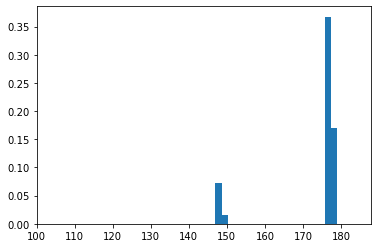

In [84]:
bin = np.linspace(100, 150, 1000);
a3, b3 = norm.fit(z3)
a4, loc4, scale4 = g.fit(z3)
bins, count, ignored = plt.hist(z3, 20, density=True);
#plt.plot(bin, norm(a3, b3*0.06).pdf(bin))
plt.plot(bins, g(a4, loc4, scale4).pdf(bins))
plt.xlim(100)

# RV4: Eclipse Magnitude

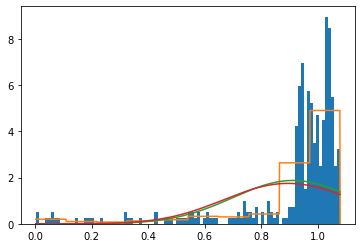

In [85]:
# Filtering the desired data array from the DataFrame

z = np.array(df['Eclispe_Magnitude'])
#z = z[z.nonzero()]

# Population -- Mean, Variance and Standard Deviation
population_mean_2 = d(z).mean
population_var_2 = d(z).variance
population_stddev_2 = np.sqrt(population_var_2)

# Creating an array for plotting fitted distributions
bin = np.linspace(min(z), max(z), 1000)

# Fitting standard distributions to the data

## With pre-defined routines in SCIPY
hist = np.histogram(z)
hist_dist = ss.rv_histogram(hist)

## Manual fitting
a9, loc5 = norm.fit(z)
a10, loc6, scale5 = g.fit(z)

plt.hist(z, 100, density=True);
plt.plot(bin, hist_dist.pdf(bin))
plt.plot(bin, norm(a9, loc5).pdf(bin))
plt.plot(bin, g(a10, loc6, scale5).pdf(bin))